# Plot GEBCO bathymetry and mask for the All European Seas domain

In [17]:
using DIVAnd
using ColorSchemes
using NCDatasets
using GeoDatasets
using CairoMakie, GeoMakie
using GeometryOps, GeoInterface
using JupyterFormatter
enable_autoformat()
include("./config.jl")

draw_domain

In [6]:
import Pkg; Pkg.add("GeoInterface")

   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [cf35fbd7] + GeoInterface v1.4.1
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [2]:
topodir = "/home/ctroupin/data/GEBCO/"
topofile = joinpath(topodir, "gebco_30sec_16.nc")
bx, by, b = DIVAnd.extract_bath(topofile, true, lonr, latr)
b[b.<0.0] .= NaN;

lon_landsea, lat_landsea, landsea = GeoDatasets.landseamask(; resolution = 'i', grid = 5)
landsea[landsea.==2] .= 1;

LoadError: UndefVarError: `lonr` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [3]:
xi, yi, mask = load_mask(topofile, true, lonr, latr, 0.0);
coordinatelist = read_polygon_json("./mask.json");
edit_mask!(xi, yi, mask, coordinatelist)

LoadError: UndefVarError: `lonr` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

## Make the plot

In [24]:
cmap = cgrad(:deep)

fig = Figure(size = (600, 600))
ga = GeoAxis(
    fig[1, 1],
    title = "GEBCO bathymetry and land-sea mask\nfor the All European Seas domain",
    dest = "+proj=ortho +lon_0=15 +lat_0=35",
)
heatmap!(
    ga,
    lon_landsea,
    lat_landsea,
    landsea,
    colormap = Reverse(:greys),
    colorrange = [0, 2],
)
hm = heatmap!(
    ga,
    bx,
    by,
    b,
    colormap = cmap,
    colorrange = (0, 6000.0),
    highclip = cmap.colors[end],
)
masklayer = contourf!(xi, yi, mask, levels = [0.0, 0.0001], colormap = Reverse(:binary))
    
for (regionnames, regioncoords) in domains
    draw_domain(ga, regioncoords, domaincolors[regionnames])
end

xlims!(ga, -180, 180.0)
ylims!(ga, -90.0, 90.0)
hidedecorations!(ga)
Colorbar(fig[1, 2], hm, label = "m", labelrotation = 0)
save(joinpath(figdir, "gebco_bathy_mask_domains.png"), fig)
# fig

CairoMakie.Screen{IMAGE}


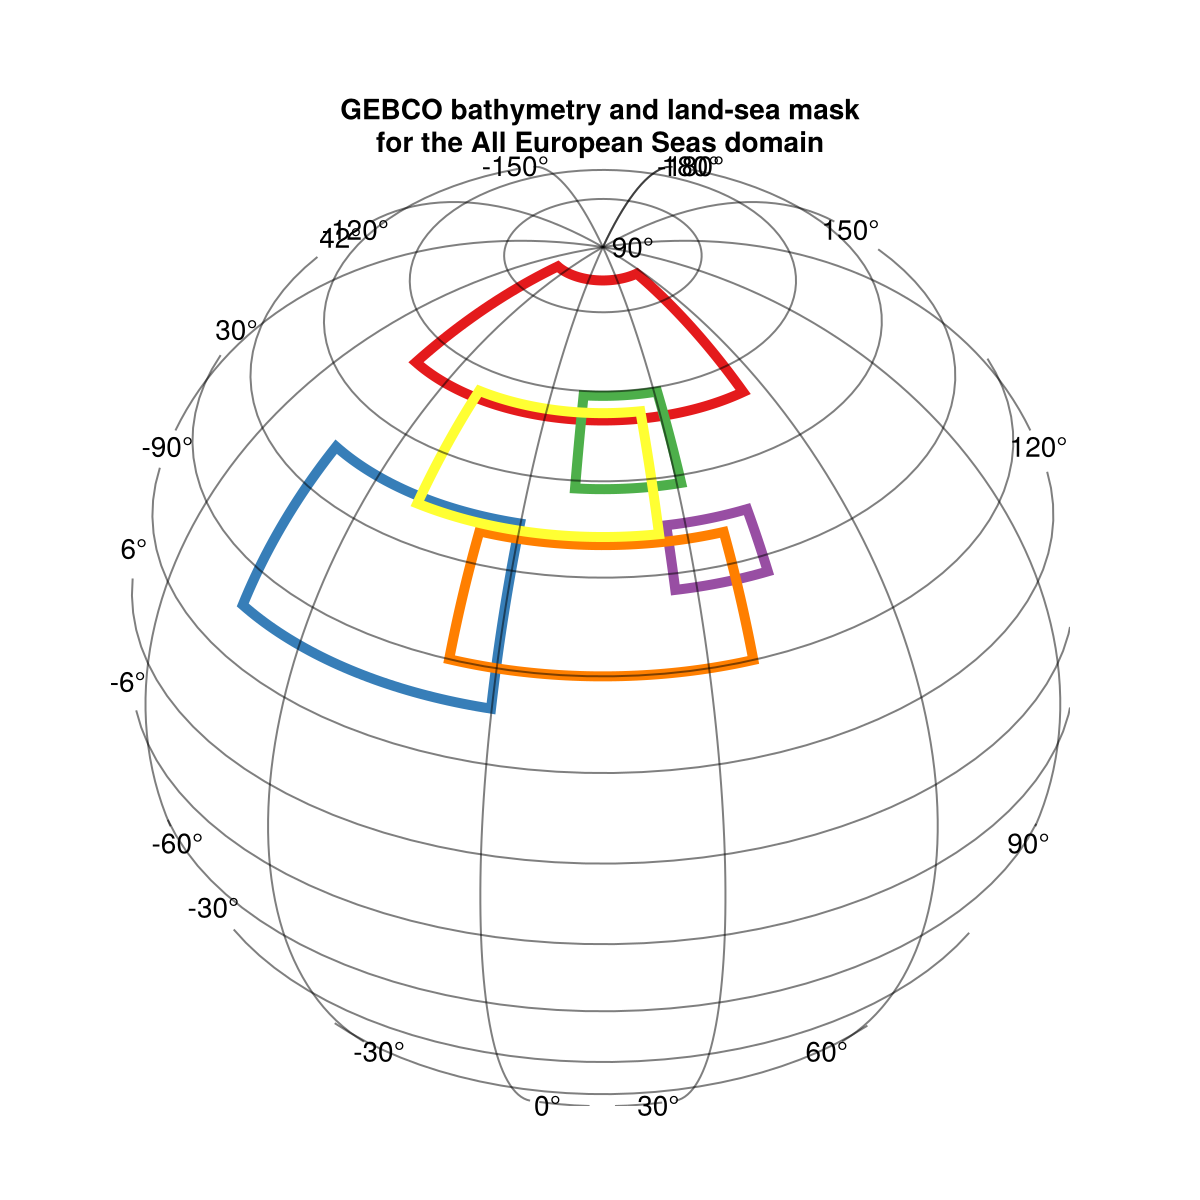

In [11]:
fig = Figure(size = (600, 600))
ga = GeoAxis(
    fig[1, 1],
    title = "GEBCO bathymetry and land-sea mask\nfor the All European Seas domain",
    dest = "+proj=ortho +lon_0=15 +lat_0=35",
)

for (regionnames, regioncoords) in domains
    draw_domain(ga, regioncoords, domaincolors[regionnames])
end
xlims!(ga, -180, 180.0)
ylims!(ga, -90.0, 90.0)
fig

In [16]:
typeof("#e41a1c")

String

In [14]:
typeof(keys(first(domains)))

LoadError: MethodError: no method matching keys(::Pair{String, Vector{Float64}})
The function `keys` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  keys([91m::Pkg.Registry.RegistryInstance[39m)
[0m[90m   @[39m [35mPkg[39m [90m~/.julia/juliaup/julia-1.11.3+0.x64.linux.gnu/share/julia/stdlib/v1.11/Pkg/src/Registry/[39m[90m[4mregistry_instance.jl:449[24m[39m
[0m  keys([91m::Attributes[39m)
[0m[90m   @[39m [36mMakieCore[39m [90m~/.julia/packages/MakieCore/EU17Y/src/[39m[90m[4mattributes.jl:36[24m[39m
[0m  keys([91m::StructTypes.SubTypeClosure[39m)
[0m[90m   @[39m [32mStructTypes[39m [90m~/.julia/packages/StructTypes/PaLwj/src/[39m[90m[4mStructTypes.jl:599[24m[39m
[0m  ...
